<div class="output_png output_subarea output_execute_result">
</div>

# 	Combined probabilities: wind speed >10m/s and total precipitation > 1mm

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/medium-ens-tp-ws  


<div class="output_png output_subarea output_execute_result">
<center>
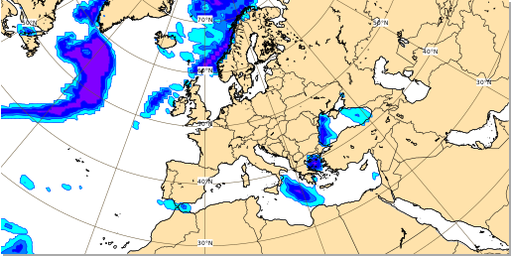</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 3 parameters :

* [Total precipitation](https://codes.ecmwf.int/grib/param-db/228)
* [10 metre U wind component](https://codes.ecmwf.int/grib/param-db/165)
* [10 metre V wind component](https://codes.ecmwf.int/grib/param-db/166)

In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-opendata metview metview-python

In [1]:
import metview as mv
from ecmwf.opendata import Client

In [2]:
client = Client("ecmwf", beta=True)

In [3]:
parameters = ['10u','10v','tp']
filename = 'medium-ens-tp-ws.grib'
filename

'medium-ens-tp-ws.grib'

We need to put both **cf** and **pf** as type **type** to download all 50 ensemble members as well as the control forecast.  
Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [4]:
client.retrieve(
    date=0,
    time=0,
    step=[21,24],
    stream="enfo",
    type=['cf', 'pf'],
    levtype="sfc",
    param=parameters,
    target=filename
)

<multiple>:   0%|          | 0.00/245M [00:00<?, ?B/s]

## Reading and processing the data
Now we can use **Metview's read() function** to read the file.

In [5]:
data = mv.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [6]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20250108,0,"21,24","0,1,...",165,od,enfo,"cf,pf",0001
10v,heightAboveGround,10,20250108,0,"21,24","0,1,...",166,od,enfo,"cf,pf",0001
tp,surface,0,20250108,0,"21,24","0,1,...",228,od,enfo,"cf,pf",0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [7]:
data.describe('tp')

shortName,tp
name,Total precipitation
paramId,228
units,m
typeOfLevel,surface
level,0
date,20250108
time,0
step,"21,24"
number,"0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,45,46,47,48,49,5,50,6,7,8,9"
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tp,surface,0,20250108,0,0-21,pf,14,regular_ll
1,ecmf,10v,heightAboveGround,10,20250108,0,21,pf,23,regular_ll
2,ecmf,10v,heightAboveGround,10,20250108,0,21,pf,50,regular_ll
3,ecmf,10u,heightAboveGround,10,20250108,0,21,pf,6,regular_ll
4,ecmf,10u,heightAboveGround,10,20250108,0,21,pf,33,regular_ll
5,ecmf,10v,heightAboveGround,10,20250108,0,21,pf,32,regular_ll
6,ecmf,tp,surface,0,20250108,0,0-21,pf,23,regular_ll
7,ecmf,10u,heightAboveGround,10,20250108,0,21,pf,42,regular_ll
8,ecmf,tp,surface,0,20250108,0,0-21,pf,50,regular_ll


**Metview** library has a built in function to calculate the speed from u and v components. It takes u/v fieldsets as input and gives back speed intensity.  
Note that we can give a fieldset on N u/v components, not just one pair.  

In this case we will calculate all 51 ensemble members at the same time.  
First we need to filter out u and v and sort the fieldsets.

In [9]:
u = data.select(shortName='10u', step=24).sort()
v = data.select(shortName='10v', step=24).sort()

speed = mv.speed(u,v)
speed.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10si,heightAboveGround,10,20250108,0,24,"0,1,...",207,od,enfo,"cf,pf",0001


In [10]:
speed.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,10si,heightAboveGround,10,20250108,0,24,cf,0,regular_ll
1,ecmf,10si,heightAboveGround,10,20250108,0,24,pf,1,regular_ll
2,ecmf,10si,heightAboveGround,10,20250108,0,24,pf,10,regular_ll
3,ecmf,10si,heightAboveGround,10,20250108,0,24,pf,11,regular_ll
4,ecmf,10si,heightAboveGround,10,20250108,0,24,pf,12,regular_ll
5,ecmf,10si,heightAboveGround,10,20250108,0,24,pf,13,regular_ll
6,ecmf,10si,heightAboveGround,10,20250108,0,24,pf,14,regular_ll
7,ecmf,10si,heightAboveGround,10,20250108,0,24,pf,15,regular_ll
8,ecmf,10si,heightAboveGround,10,20250108,0,24,pf,16,regular_ll


To calculate the probability of wind speed being greater than 10 m/s and total precipitation being greater than 1 mm (0.001 m), we need to mask where these conditions are filled for each ensemble member.  
First we make an empty fieldset object, and then we append each mask field to it.  
Finally we can calculate the probability by calculating mean of this fieldset and multiplying by 100.  

One aditional step we need to do here is to calculate the total precipitation between steps 21 and 24, because the raw data has the total precipitation accumulated from the start of the forecast.

In [11]:
mask = mv.Fieldset()
for number in range(51):
    speed_n = speed.select(number = number,)
    tp_24 = data.select(shortName='tp',step=24, number = number)
    tp_21 = data.select(shortName='tp',step=21, number = number)
    tp_n = tp_24 - tp_21
    m = (speed_n > 10) & (tp_n >= 0.001)
    mask.append(m)

prob = (mv.mean(mask))*100

And finally, we can plot the data on the map. 

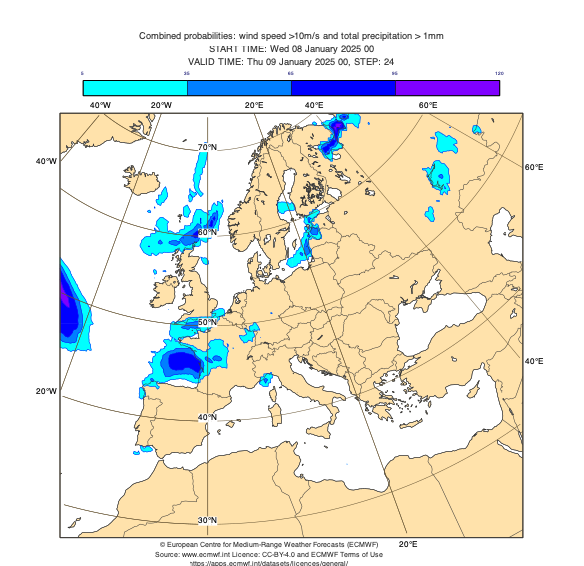

In [12]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
prob_shade = mv.mcont(legend= "on",
                contour_automatics_settings = "style_name",
                contour_style_name = "sh_blup_f0t100lst")

title = mv.mtext(
    text_lines=["Combined probabilities: wind speed >10m/s and total precipitation > 1mm", 
                "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
                "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H'/>, STEP: <grib_info key='step' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, prob, prob_shade, title, ecmwf_text)

To generate the png file you can run the following cell.

In [13]:
png = mv.png_output(
      output_name = "medium-ens-tp-ws",   # specify relative or full path
      output_title = "medium-ens-tp-ws",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, prob, prob_shade, title, ecmwf_text)

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.25x0.25 resolution, while high resolution data is 0.1x0.1 grid.